# Veri Bilimi İçin İstatistik 101

## Temel İstatistik

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Örnek Teorisi

* Bir ilçedeki kişilerin yaş ortalamasını merak ediyoruz varsayalım. Ama ilçe nüfusu 10k olduğu için her birisiyle görüşüp bilgi almak imkansız bunun yerine 100 kişilik örneklem alarak bu 100 kişinin yaş ortalamasını çekip bu ilçe ile ilgili yaş ortalamasını tahmin etmeye çalışıyoruz.

In [4]:
populasyon = np.random.randint(0, 80, 10000)

In [5]:
populasyon[0:10]

array([74, 11, 39, 49, 63, 48, 75, 26, 41, 78])

----------------------------------------------------------------------------------------------------------------------------------------------------

#### Örneklem Çekme

In [6]:
np.random.seed(10)          
# Buradaki "seed" bizim randomla çektiğimiz verinin sürekli aynı gelmesini sağlıyor.
orneklem = np.random.choice( a = populasyon, size = 100)
orneklem[0:10]

array([55, 14, 76, 34,  9, 18, 57,  6, 34, 67])

In [7]:
orneklem.mean()

40.95

In [8]:
populasyon.mean()

39.7371

----------------------------------------------------------------------------------------------------------------------------------------------------

### Örneklem Dağılımı

In [9]:
np.random.seed(10)
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [10]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean()
+ orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean() ) / 10

38.856

----------------------------------------------------------------------------------------------------------------------------------------------------

### Betimsel İstatistikler

In [11]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [13]:
!pip install researchpy

In [14]:
import researchpy as rp

In [15]:
rp.summary_cont(df[["total_bill", "tip", "size"]])  
# Bu sürekli değişekler(sayısal değişkenler) için kullanılıyor. 
# N: Gözlem Sayıları
# Mean: Ortalama değeri 
# SD: Standart Sapması
# SE: Standart hatası
# 95% Conf.	: Güven değeri 
# Interval: Güven Aralığı

C:\Users\ASUS\anaconda3\Lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [16]:
rp.summary_cat(df[["sex", "smoker", "day"]]) 
# Bu ise kategorik değişkenler için

C:\Users\ASUS\anaconda3\Lib\site-packages\researchpy\summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [17]:
df[["tip", "total_bill"]].cov()    # Buradaki "cov" kovaryansı ifade ediyor.
# Kovaryans: Değişkenlerin ilişkilerine ilişkin değişkenlik ölçüsü verir.

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [18]:
df[["tip", "total_bill"]].corr()    # Buradaki "corr" korelasyon ifade ediyor.

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


----------------------------------------------------------------------------------------------------------------------------------------------------

### İş Uygulaması: Fiyat Stratejisi Karar Destek

In [19]:
fiyatlar = np.random.randint(10, 110, 1000)

In [20]:
fiyatlar.mean()

58.492

In [21]:
import statsmodels.stats.api as sms

In [22]:
sms.DescrStatsW(fiyatlar).tconfint_mean()
# confint= confidence interval'in kısaltması
# Bu kod bize istatistiksel olarak %95 güvenilirlikle  56 ile 60 arasındadır.
# Diğer ifade ile %5'lik kısmı bu aralık dışındadır. 
# Bize bilimsel olarak belirlenmesi için en iyi fiyat aralığıdır.

(56.67953887736034, 60.30446112263965)

----------------------------------------------------------------------------------------------------------------------------------------------------

## Olasılığa Giriş

### Bernoulli Dağılımı

#### Formül:

${\displaystyle f(k;p) = p^{k}(1-p)^{1-k}\quad  {\text{for }} k\in \{0,1\}}$ 

${\displaystyle \operatorname {E} \left(X\right)=p}$ 

$\operatorname {Var} [X]=pq=p(1-p)$ 

* Yazı Tura Kodu

In [23]:
from scipy.stats import bernoulli

In [24]:
p = 0.6
orn = bernoulli(p)
orn.pmf( k = 1)

0.6

----------------------------------------------------------------------------------------------------------------------------------------------------

### Büyük Sayılar Yasası

In [25]:
rng = np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size = deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı: ", deney_sayisi,"---","Yazı Olasılığı: %.2f" % (yazi_olasiliklari * 100))

Atış Sayısı:  2 --- Yazı Olasılığı: 50.00
Atış Sayısı:  4 --- Yazı Olasılığı: 0.00
Atış Sayısı:  8 --- Yazı Olasılığı: 62.50
Atış Sayısı:  16 --- Yazı Olasılığı: 43.75
Atış Sayısı:  32 --- Yazı Olasılığı: 46.88
Atış Sayısı:  64 --- Yazı Olasılığı: 56.25
Atış Sayısı:  128 --- Yazı Olasılığı: 50.78
Atış Sayısı:  256 --- Yazı Olasılığı: 52.73
Atış Sayısı:  512 --- Yazı Olasılığı: 52.93
Atış Sayısı:  1024 --- Yazı Olasılığı: 50.20
Atış Sayısı:  2048 --- Yazı Olasılığı: 48.58
Atış Sayısı:  4096 --- Yazı Olasılığı: 49.49
Atış Sayısı:  8192 --- Yazı Olasılığı: 49.58
Atış Sayısı:  16384 --- Yazı Olasılığı: 49.96
Atış Sayısı:  32768 --- Yazı Olasılığı: 50.00
Atış Sayısı:  65536 --- Yazı Olasılığı: 49.68
Atış Sayısı:  131072 --- Yazı Olasılığı: 49.97
Atış Sayısı:  262144 --- Yazı Olasılığı: 50.13
Atış Sayısı:  524288 --- Yazı Olasılığı: 50.01
Atış Sayısı:  1048576 --- Yazı Olasılığı: 50.09


----------------------------------------------------------------------------------------------------------------------------------------------------

### Binom Dağılım

#### Formül: 

${\displaystyle f(k;n,p) = \binom{n}{k}p^{k}(1-p)^{1-k}\quad   {k = 0,1,2,...,n}}$ 

${\displaystyle \operatorname {E} \left(X\right)=np}$ 

$\operatorname {Var} [X]=np(1-p)$ 

#### İş Uygulaması: Reklam Harcaması Optimizasyonu

Problem: Çeşitli mecralara reklam veriliyor, reklamların tıklanma ve geri dönüşüm oranları optimize edilmeye çalışılıyor. Buna yönelik olarak belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniliyor.
* Detaylar: Bir mecrada reklam verilecek
* Dağılım ve reklama tıklama olasılığı biliniyor (0.01)
* Soru: Reklamı 100 kişi gördüğünde 1,5,10 tıklanması olasılığı nedir?

In [26]:
from scipy.stats import binom

In [27]:
p = 0.01
n = 100
rv = binom(n,p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764972666
0.002897787123761478
7.006035693977194e-08


----------------------------------------------------------------------------------------------------------------------------------------------------

### Poisson Dağılımı

### Formül:

${\displaystyle P(k; \lambda) = \frac{ \lambda^k \cdot e^{-\lambda} }{k!} }\quad  {k = 0,1,2,...,n} $    

${\displaystyle \operatorname {E} \left(X\right)= \lambda}$ 

$\operatorname {Var} [X]= \lambda$ 

#### İş Uygulaması: İlan Girişi Hata Olasılıkları

Problem: Hatalı ilan girişi olasılıkları hesaplanmak isteniyor.
* Detaylar:
* Bir yıl süresince ölçümler yapılıyor
* Dağılım biliniyor (Poisson) ve Lambda 0.1 (ortalama hata sayısı)
* Soru: Hiç hata olmaması, 3 hata olması ve 5 hata olması olasılıkları nedir?

In [28]:
from scipy.stats import poisson

In [29]:
lambda_ = 0.1

In [30]:
rv = poisson(mu = lambda_)
print (rv.pmf(k = 0))
print (rv.pmf(k = 3))
print (rv.pmf(k = 5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


----------------------------------------------------------------------------------------------------------------------------------------------------

### Normal Dağılım

#### Formül:
$ {\displaystyle f(\mathop x | \mathop \mu, \sigma^2) = \frac{1}{\sqrt {2\pi \sigma^2}} \, e^{-\frac{(x - \mu)^2}{2\sigma^2}}}$

* ${\mu}$ ortalama ya da dağılımın beklenen değeri
* ${\sigma}$ standart sapma
* ${\sigma^2}$ varyans



### İş Uygulaması: Satış Olasılıklarının Hesaplanması

Problem: Bir yatırım/toplantı öncesinde gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.
* Detaylar:
* Dağılımın normal olduğu biliniyor
* Aylık ortalama satış sayısı 80K, standart sapması 5K

In [31]:
from scipy.stats import norm 

* Soru: 90K'dan fazla satış yapma olasılığı nedir?

In [32]:
1-norm.cdf(90, 80, 5)

0.02275013194817921

* Soru: 70K'dan fazla satış yapma olasılığı nedir?

In [33]:
1-norm.cdf(70, 80, 5)

0.9772498680518208

* Soru: 73K'dan az satış yapma olasılığı nedir?

In [34]:
norm.cdf(73, 80, 5)

0.08075665923377107

* Soru: 85K ile 90K arasında satış yapma olasılığı nedir?

In [35]:
norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5) 

0.13590512198327787

----------------------------------------------------------------------------------------------------------------------------------------------------

# Veri Bilimi İçin İstatistik 201

## Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır. 

**Hipotezler**

${H_0: \mu = 50}$

${H_0: \mu \neq 50}$

${H_0: \mu \leq 50}$

${H_0: \mu > 50}$

${H_0: \mu \geq 50}$

${H_0: \mu < 50}$


### Test İstatistiği 
#### Formül:

$ Z = \frac{\bar{x} - \mu_0}{\frac{\mathrm{\textbf{s}}}{\sqrt{n}}} $




----------------------------------------------------------------------------------------------------------------------------------------------------

### İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

Problem:
Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

* Detaylar:
* Yazılımlardan elde edilen web sitesinde geçirilen ort. süreler var.
* Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

In [36]:
olcumler = np.array ([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119,
                     157, 145, 127, 244, 163, 114, 145, 65, 112, 185, 202, 146, 
                     203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110,
                     216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120 ])

In [37]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [38]:
import scipy.stats as stats

In [39]:
stats.describe(olcumler)   # Burda ort 154 çıktı fakat bu şansa da oluşmuş olabilir. Bu yüzden bir hipotez oluşturacağız. 

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

* Varsayımlar 
#### Tek Örneklem T Testi Varsayımı: Normal varsayım

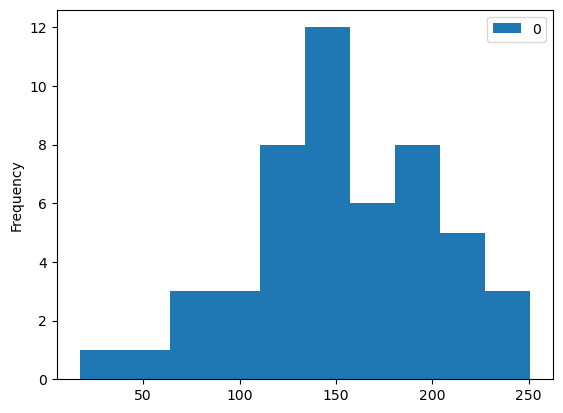

In [40]:
# Histogram 

pd.DataFrame(olcumler).plot.hist();

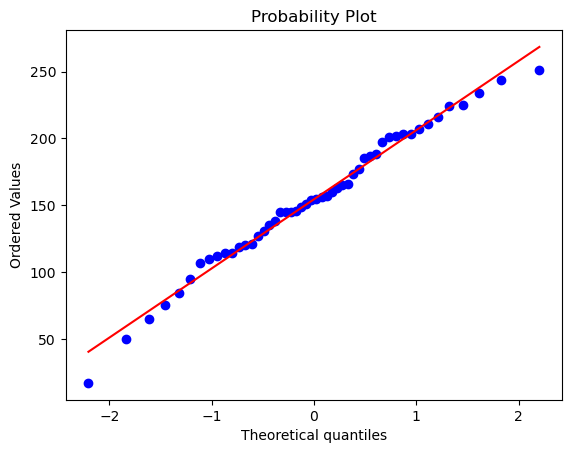

In [41]:
# qqplot 

import pylab
stats.probplot(olcumler, dist = "norm", plot = pylab)
pylab.show()

In [42]:
# Shapiro-Wikls Testi:

$H_0:$ Örnek dağılım ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur. 

$H_1:$ Örnek dağılım ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır. 

In [43]:
from scipy.stats import shapiro

In [44]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853101372718811, pvalue=0.7848551869392395)

#### Tek Örneklem T Testinin Hipotezinin Uygulanması

In [45]:
stats.ttest_1samp(olcumler, popmean = 170)

TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

$H_0:$ Web sitemizde geçirilen süre ortalama süre 170 sn'dir.

$H_1:$ Web sitemizde geçirilen süre ortalama süre 170 sn değildir.

#### Nonparametrik Tek Örneklem Testi

In [46]:
from statsmodels.stats.descriptivestats import sign_test

In [47]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

Bu ölçüme göre "p-value < $\alpha$" olduğu için $H_0$ Hipotezi reddedilir. Bu sonuç ortalama süre 170'den küçük sonucuna vardırır.

----------------------------------------------------------------------------------------------------------------------------------------------------

#### Tek Örneklem Oran Testi

* Oransal bir ifade test edilmek istenildiğinde kullanılır.

* Hipotezler:

${H_0: p = p_0}$

${H_1: p \neq p_0}$

${H_0: p \leq p_0}$

${H_1: p > p_0}$

${H_0: p \geq p_0}$

${H_1: p < p_0}$

#### Formül: 

$ z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0  (1 - p_0)}{n}}} $

----------------------------------------------------------------------------------------------------------------------------------------------------

### İş Uygulaması: Dönüşüm Oranı Testi

* Örneğin web sitesinde bir ürün satıyorsunuz. Bu ürünü 100 kişi gördü fakat 1 kişi aldı diyelim. Bu durumda dönüşüm oranı 1/100'dür. Yani 0,01'dir. Veya bu bir reklam olarak da düşünülebilir. Dönüşüm Oranı; Click, True, Reyt vb. kavramlarla değerlendirilebilir. 
* Bizim için Dönüşüm Oranı: "İlgilenilen olay / O olayı gerçekleştirmek üzere o duruma maruz kalan kişi sayısı". Yani "reklama tıklayan kişi sayısı / o reklamı gören kişi sayısı". 

#### Problem: 
* Bir yazılım ile bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edildiği ifade edilmiş. Fakat bu durum kontrol edilmek isteniyor. Çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor.

#### Detaylar:
* 500 kişi dış mecrada reklamlara tıklamış, 40 tanesi sitemize gelip alişveriş yapmış.
* Örnek üzerinden elde edilen dönüşüm oranı: 40/500 = 0,08
* Not: "." python ile ingilizce de ondalıklı sayı anlamına geliyor. "," ise türkçede ondalıklı sayı anlamında.

##### Hipotezler: 
${H_0: p = 0.125}$

${H_1: p \neq 0.125}$

In [48]:
from statsmodels.stats.proportion import proportions_ztest

In [49]:
count = 40      # Başarı sayımız. Detaylar kısmında verilmiş.
nobs = 500      # Gözlem sayımız. Detaylar kısmında verilmiş.
value = 0.125   # Test etmek istediğimiz değerimiz.

In [50]:
proportions_ztest(count, nobs, value)  # Bu fonk. içine ilk argümanda başarı sayısını, ikincisinde gözlem sayısını ve üçüncüde test edilmek istenen değeri yazıyoruz.

# aşağıda iki sonuç çıktı. İlki z-test istatistiği, ikincisi ise p-value değerimiz.

(-3.7090151628513017, 0.0002080669689845979)

Bu sonuca göre "p-value > $\alpha$" olduğundan dolayı ${H_0}$ Hipotezi reddedilir. ${H_0}$ Hipotez değerimiz 0.125'di. Yaptığımız teste göre bu değer yanlış bir değerdir.

----------------------------------------------------------------------------------------------------------------------------------------------------

## Bağımsız İki Örneklem T Testi (AB Testi) Teorisi

* Tanım: İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır. 
* Terminolojik Tanımı: Elimizde gerçek değerlerini bilmediğimiz iki tane ana kitle parametresi var. Fakat bunlar ana kitlelerin ortalamaları. Biz bu ortalamaların birbirinden farkını inceliyoruz. Buna yönelik olarak elde ettiğmiz örneklemler üzerinden karşılalaştırma yapmamız gerekiyor. İşte biz bunları iki grup ortalamasına indirgemiş oluyoruz. Yani elimizde örnek ortalaması olacak. Bunlar arasındaki farkı test edip gerçekte bilmediğimiz ana kitlenin değerlerine ilişkin bu bir farkın istatistiksel olarak var olup olmadığını değerlendirmiş olucaz. 

#### Hipotezler

${H_0: \mu_1 = \mu_2}$

${H_1: \mu_1 \neq \mu_2}$

${H_0: \mu_1 \leq \mu_2}$

${H_1: \mu_1 > \mu_2}$

${H_0: \mu_1 \geq \mu_2}$

${H_1: \mu_1 < \mu_2}$


#### Ana Formül: 

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$$

#### 1.Durum: Örnek sayıları aynı, varyanslar homojen ise;

$$t = \frac{\bar{X}_1 - \bar{X}_2}{S_p \sqrt{\frac{2}{n}}}  ,   S_p = \sqrt{\frac{S^2(x_1) + S^2(x_2)}{2}}$$

#### 2.Durum: Örnek sayıları farklı, varyanslar homojen ise;

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}   ,   S_p = \sqrt{\frac{(n_1 - 1)s^2x_1 + (n_2 - 1)s^2x_2}{n_1 + n_2 - 2}}$$

#### 3.Durum: Örnek sayıları farklı, varyanslar homojen değilse;

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$$

### !!! Önemli Not: Son iki Formül için örnek sayıları eşit olması durumunda da hesaplamalar yapılabilir. 
### !!! 3.Durum İçin Not: 3.Durum "Welch Testi" olarak geçer.

#### Varsayımlar: 
* Normallik
* Varyans Homojenliği

----------------------------------------------------------------------------------------------------------------------------------------------------

### İş Uygulaması: ML Modelinin Başarı Testi
#### Problem: 
* Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor.

#### Detaylar:
* Model geliştirilmiş ve web sitesine entegre edilmiş.
* Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun.
* A grubu eski B grubu yeni sistem.
* Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

#### Hipotezler

${H_0: \mu_1 = \mu_2}$

${H_1: \mu_1 \neq \mu_2}$

In [51]:
# VERI TIPI I

In [52]:
A = pd.DataFrame([ 30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 23, 27, 23, 
            25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([ 37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 32, 31, 31, 27, 
            32, 33, 33, 33, 31, 32, 26, 32, 33, 29])

A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A", "B"]

A_B.head()

,A,B
0,30,37.0
1,27,39.0
2,21,31.0
3,27,31.0
4,29,34.0


In [53]:
# VERI TIPI II

In [54]:
A = pd.DataFrame([ 30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 23, 27, 23, 
            25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([ 37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 32, 31, 31, 27, 
            32, 33, 33, 33, 31, 32, 26, 32, 33, 29])

# A ve A'nın Grubu 
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

# B ve B'nin Grubu 
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

# Tüm Veri
AB = pd.concat([A,B])
AB.columns = ["gelir", "GRUP"] 
print(AB.head())
print(AB.tail())


   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
24     32    B
25     26    B
26     32    B
27     33    B
28     29    B


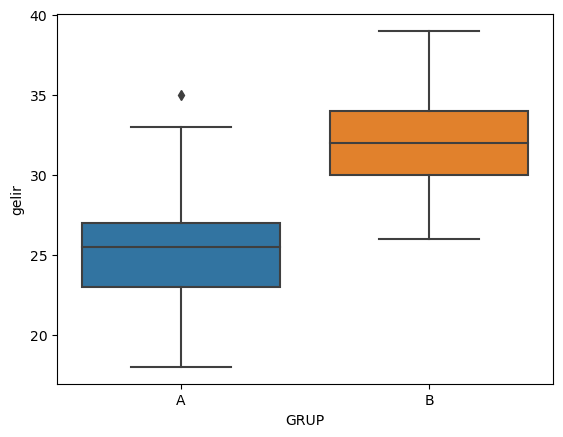

In [55]:
# Yukarıdaki verinin mevcut yapısını görselleştirme:

sns.boxplot(x = "GRUP", y = "gelir", data = AB);

----------------------------------------------------------------------------------------------------------------------------------------------------

### Bağımsız İki Örneklem T Testi Varsayım Kontrolü

#### Varsayım Kontrolü 

In [56]:
A_B.head()           # A ve B gruplarındaki değerlerin ayrı sütunlarda yer aldığı veri seti.

,A,B
0,30,37.0
1,27,39.0
2,21,31.0
3,27,31.0
4,29,34.0


In [57]:
AB.head()          # Gelirin kendi sütununda olduğu ve gruplarında kendi sütununa indirgendiği veri seti.

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [58]:
# Normallik Varsayımı

In [59]:
from scipy.stats import shapiro

In [60]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [61]:
shapiro(A_B.B)

ShapiroResult(statistic=nan, pvalue=1.0)

#### Hipotezler:

${H_0: Varyanslar\quad Homojendir} $

${H_1: Varyanslar\quad Homojen\quad  degildir} $

In [62]:
stats.levene(A_B.B,  A_B.A)

LeveneResult(statistic=nan, pvalue=nan)

----------------------------------------------------------------------------------------------------------------------------------------------------

### Bağımsız İki Örneklem T Testi Uygulaması 

#### Hipotez Testi

In [63]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True )

Ttest_indResult(statistic=nan, pvalue=nan)

In [64]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True )
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi, pvalue))

Test İstatistiği = nan, p-değeri = nan


### Nonparametrik Bağımsız İki Örneklem Testi

In [65]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [66]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"], equal_var = True )
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi, pvalue))

Test İstatistiği = nan, p-değeri = nan


----------------------------------------------------------------------------------------------------------------------------------------------------

### Bağımlı İki Örneklem T Testi 
#### Tanım: Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.
#### Hipotezler:

${H_0: \mu_o = \mu_s}$

${H_1: \mu_o \neq \mu_s}$

${H_0: \mu_o \leq \mu_s}$

${H_1: \mu_o > \mu_s}$

${H_0: \mu_o \geq \mu_s}$

${H_1: \mu_o < \mu_s}$

#### Formül: Test İstatistiği

$$ t = \frac{\bar{x_d} - \mu_0 }{\frac {s_d } {\sqrt n}} $$

#### Varsayımlar:
* Normallik, Varyans Homojenliği

----------------------------------------------------------------------------------------------------------------------------------------------------

### İş Uygulaması: Şirket İçi Eğitimin Performans Etkisi Ölçümü
#### Problem: 
* Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.

#### Detaylar: 
* Bir departman bir konuda eğitim talep ediyor
* Gerekli/gereksiz değerIendirmeleri neticesinde eğitim alınıyor
* Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor
* Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

In [67]:
oncesi = pd.DataFrame( [123, 119, 119, 116, 123, 123, 121, 120, 117, 118, 121, 121, 123, 119,
                121, 118, 124, 121, 125, 115, 115, 119, 118, 121, 117 , 117 , 120, 120,
                121, 117 , 118, 117 , 123, 118, 124, 121, 115, 118, 125, 115] )
sonrasi = pd.DataFrame( [118, 127 , 122, 132, 129, 123, 129, 132, 128, 130, 128, 138, 140, 130,
                134, 134, 124, 140, 134, 129, 129, 138, 134, 124, 122, 126, 133, 127 ,
                130, 130, 130, 132, 117, 130, 125, 129, 133, 120, 127, 123] )


In [68]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [69]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [70]:
# Birinci Veri Seti
AYRIK = pd.concat([oncesi, sonrasi], axis=1)
AYRIK.columns = ["ONCESI", "SONRASI"]
print("'AYRIK' Veri Seti:\n\n", AYRIK.sample(5), "\n\n")

# İkinci Veri Seti
# ONCESI FLAG/TAG'INI OLUŞTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"

# FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis=1)

# SONRASI FLAG/TAG'INI OLUŞTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

# FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis=1)

# TUM VERİYİ BIR ARAYA GETİRME
BIRLIKTE = pd.concat([A, B])
      
# ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS", "ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti:\n\n", BIRLIKTE.sample(5),  "\n")


'AYRIK' Veri Seti:

     ONCESI  SONRASI
19     115      129
28     121      130
5      123      123
11     121      138
13     119      130 


'BIRLIKTE' Veri Seti:

     PERFORMANS ONCESI_SONRASI
29         130        SONRASI
19         129        SONRASI
39         123        SONRASI
21         138        SONRASI
2          119         ONCESI 



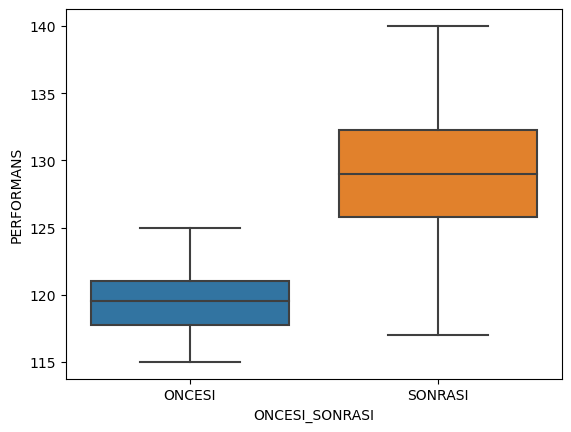

In [71]:
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

----------------------------------------------------------------------------------------------------------------------------------------------------

### Bağımlı İki Örneklem T Testi Varsayım Kontrolleri

In [72]:
from scipy.stats import shapiro

In [73]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722016543149948)

In [74]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780092239379883, pvalue=0.6159630417823792)

In [75]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI) 

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

----------------------------------------------------------------------------------------------------------------------------------------------------

### Bağımlı İki Örneklem T Testi Uygulaması

In [76]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

In [77]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print("Test İstatistiği = %.4f, p-değeri = %.4f " % (test_istatistigi, pvalue))

Test İstatistiği = -9.2815, p-değeri = 0.0000 


----------------------------------------------------------------------------------------------------------------------------------------------------

### Nonparametrik Bağımlı İki Örneklem Testi

In [78]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [79]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])
print("Test İstatistiği = %.4f, p-değeri = %.4f " % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000 


----------------------------------------------------------------------------------------------------------------------------------------------------

### İki Örneklem Oran Testi

#### Tanım: İki oran arasında karşılaştırma yapmak için kullanılır.

#### Hipotezle:

${H_0: p_1 = p_2}$

${H_1: p_1 \neq p_2}$

${H_0: p_1 \leq p_2}$

${H_1: p_1 > p_2}$

${H_0: p_1 \geq p_2}$

${H_1: p_1 < p_2}$

#### Formül: İki Örneklem Oran Testi: Test İstatistiği

$$ {z = \frac{p_1 - p_2}{\sqrt{\frac{p(1-p)}{n_1} + \frac{p(1-p)}{n_2}}}} $$

#### Varsayımlar: n 30'dan büyükse z'yi kullanarak oran testi yapılır. 

${n_1 > 30}$

${n_2 > 30}$

----------------------------------------------------------------------------------------------------------------------------------------------------

#### İş Uygulaması: Kullanıcı Arayüzü Deneyi

In [80]:
from statsmodels.stats.proportion import proportions_ztest

In [81]:
basari_sayisi = np.array([300, 250])
gozlem_sayisi = np.array([1000, 1100])

In [82]:
proportions_ztest (count = basari_sayisi, nobs = gozlem_sayisi)

(3.7857863233209255, 0.0001532232957772221)

----------------------------------------------------------------------------------------------------------------------------------------------------

### Varyans Analizi

#### Tanım: İki ya da daha fazla grup ortalaması arasında istatistiksel olarak anlamlı farklılık olup olmadığı öğrenilmek istenildiğinde kullanılır.

#### Hipotezler:

${H_0: \mu_1 = \mu_2 = \mu_3 }$

${H_1:}$ Eşit Değillerdir. (En az birisi farklıdır)

#### Test İstatistiği: F istatistiği olarak geçmektedir.

$${F_s =  \frac {MS_(between)}{MS_(within)}}$$

#### Varsayımlar:
* Gözlemlerin birbirinden bağımsız olması (grupların)
* Normal dağılım
* Varyans homojenliği

----------------------------------------------------------------------------------------------------------------------------------------------------

#### İş Uygulaması: Anasayfa İçerik Stratejisi Belirleme

##### Problem: Anasayfa'da geçirilen süre artırılmak isteniyor
##### Detaylar:
* Bir web sitesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb
* Uzun zaman geçiren kullanıcılarn reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
* Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.

In [83]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["Grup_A", "Grup_B", "Grup_C"]
ABC.sample(5)

,Grup_A,Grup_B,Grup_C
17,30,31,36
12,25,38,35
16,31,34,39
11,33,30,34
6,27,34,38


----------------------------------------------------------------------------------------------------------------------------------------------------

#### Varsayım Kontrolü

In [84]:
from scipy.stats import shapiro

In [85]:
shapiro(ABC['Grup_A'])

ShapiroResult(statistic=0.9771647453308105, pvalue=0.8526690006256104)

In [86]:
shapiro(ABC['Grup_B'])

ShapiroResult(statistic=0.9653159379959106, pvalue=0.5784821510314941)

In [87]:
shapiro(ABC['Grup_C'])

ShapiroResult(statistic=0.9604302644729614, pvalue=0.4721103310585022)

In [88]:
stats.levene(ABC['Grup_A'], ABC['Grup_B'], ABC['Grup_C'])

LeveneResult(statistic=0.9446786090621706, pvalue=0.3939978753114075)

----------------------------------------------------------------------------------------------------------------------------------------------------

#### Varyans Analizi Hipotez Testinin Uygulanması

In [89]:
from scipy.stats import f_oneway

In [90]:
f_oneway(ABC['Grup_A'], ABC['Grup_B'], ABC['Grup_C'])

F_onewayResult(statistic=53.46714172604916, pvalue=1.566295188711795e-14)

In [91]:
print ("{:.5f}".format(f_oneway(ABC['Grup_A'], ABC['Grup_B'], ABC['Grup_C'])[1]))

0.00000


----------------------------------------------------------------------------------------------------------------------------------------------------

### Nonparametrik Hipotez Testi

In [92]:
from scipy.stats import kruskal

In [93]:
kruskal(ABC['Grup_A'], ABC['Grup_B'], ABC['Grup_C'])

KruskalResult(statistic=41.41835051661897, pvalue=1.014190318754816e-09)

----------------------------------------------------------------------------------------------------------------------------------------------------

### Korelasyon Analizi

#### Tanım: Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

#### Hipotezler:

${H_0: \rho  = 0}$

${H_1: \rho \neq 0}$

#### Formül:

$$ r_{xy} = \frac{\sum x_i  y_i - n\bar{x}\bar{y}}{\sqrt{(\sum x_i^2 - n\bar{x}^2) \cdot  (\sum y_i^2 - n\bar{y}^2)}} $$

$$ t = r \sqrt{\frac {n - 2}{1-r^2}} $$

#### Varsayımlar:
* İki değişken içinde normallik varsayımı
* Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
* Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

----------------------------------------------------------------------------------------------------------------------------------------------------

#### İş Uygulaması: Bahşiş İle Ödenen Hesap Arasındaki İlişkinin İncelenmesi
#### Soru: Bahşiş ile ödenen hesap arasında korelasyon var mı?

#### Detaylar:
* Bahşiş veri seti:
* total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)
* tip: bahşiş
* sex: ücreti ödeyen kişinin cinsiyeti (O = male, 1 = female)
* smoker: grupta sigara içen var mı? (O = No, 1 = Yes)
* day: gün (3 = Thur, 4 = Fri, 5 = Sat, 6 = Sun)
* time: ne zaman? (O = Day, 1 = Night)
* size: grupta kaç kişi var?

In [94]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [95]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [96]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


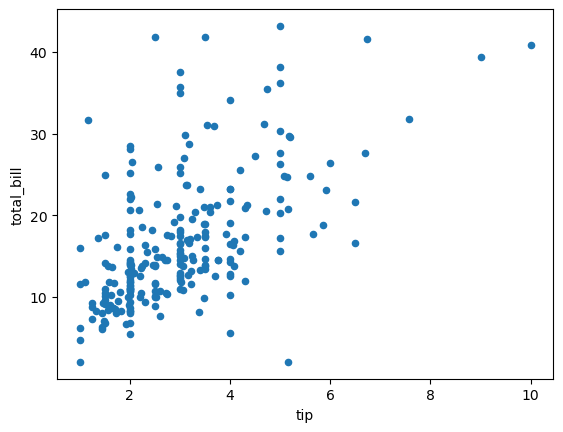

In [97]:
df.plot.scatter("tip", "total_bill");

----------------------------------------------------------------------------------------------------------------------------------------------------

#### Varsayım Kontrolü

In [98]:
from scipy.stats import shapiro

In [99]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


----------------------------------------------------------------------------------------------------------------------------------------------------

#### Hipotez Testi

##### Korelasyon kat sayısı

In [100]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [101]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

##### Korelasyonun Anlamlılığının Testi

In [102]:
from scipy.stats import pearsonr

In [109]:
korelasyon_katsayisi, pvalue = pearsonr(df["tip"], df["total_bill"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (korelasyon_katsayisi, pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


----------------------------------------------------------------------------------------------------------------------------------------------------

### Nonparametrik Kolerasyon Hipotez Testi

In [111]:
from scipy.stats import spearmanr

In [112]:
stats.spearmanr(df["tip"], df["total_bill"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16816\2823341133.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.spearmanr(df["tip"], df["total_bill"])


SignificanceResult(statistic=0.593691939408997, pvalue=1.2452285137560276e-24)

In [113]:
korelasyon_katsayisi, pvalue = stats.spearmanr(df["tip"], df["total_bill"])
print('Kolerasyon Katsayısı = %.4f, p-değeri = %.4f' % (korelasyon_katsayisi, pvalue))

Kolerasyon Katsayısı = 0.5937, p-değeri = 0.0000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16816\1218817559.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  korelasyon_katsayisi, pvalue = stats.spearmanr(df["tip"], df["total_bill"])


In [114]:
korelasyon_katsayisi, pvalue = stats.kendalltau(df["tip"], df["total_bill"])
print('Kolerasyon Katsayısı = %.4f, p-değeri = %.4f' % (korelasyon_katsayisi, pvalue))

Kolerasyon Katsayısı = 0.4401, p-değeri = 0.0000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16816\683854266.py:1: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  korelasyon_katsayisi, pvalue = stats.kendalltau(df["tip"], df["total_bill"])


### --DONE--